In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df= pd.read_csv('covid_toy.csv',usecols = ['age','fever','has_covid'])
df.sample(6)

,age,fever,has_covid
76,80,100.0,Yes
60,24,102.0,Yes
67,65,99.0,No
59,6,104.0,Yes
4,65,101.0,No
87,47,101.0,No


In [3]:
# ohe = OneHotEncoder(drop='first',sparse=False)
ohe=OneHotEncoder(drop="first",sparse=False)
df1 = ohe.fit_transform(df[['has_covid']])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        100 non-null    int64  
 1   fever      90 non-null     float64
 2   has_covid  100 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ KB


In [5]:
df.isnull().sum()

age           0
fever        10
has_covid     0
dtype: int64

In [6]:
df['fever'].fillna(df['fever'].mean(),inplace=True)

In [7]:
df.isnull().sum()

age          0
fever        0
has_covid    0
dtype: int64

In [8]:
df.sample(6)

,age,fever,has_covid
48,66,99.000000,No
85,16,103.000000,Yes
52,47,100.000000,Yes
99,10,98.000000,Yes
56,71,100.844444,No
97,20,101.000000,No


In [9]:
df3 = df.drop(columns=['has_covid']).values

In [10]:
df= np.concatenate((df3,df1),axis=1)
df

array([[ 60.        , 103.        ,   0.        ],
       [ 27.        , 100.        ,   1.        ],
       [ 42.        , 101.        ,   0.        ],
       [ 31.        ,  98.        ,   0.        ],
       [ 65.        , 101.        ,   0.        ],
       [ 84.        , 100.84444444,   1.        ],
       [ 14.        , 101.        ,   0.        ],
       [ 20.        , 100.84444444,   1.        ],
       [ 19.        , 100.        ,   0.        ],
       [ 64.        , 101.        ,   0.        ],
       [ 75.        , 100.84444444,   0.        ],
       [ 65.        ,  98.        ,   1.        ],
       [ 25.        ,  99.        ,   0.        ],
       [ 64.        , 102.        ,   1.        ],
       [ 51.        , 104.        ,   0.        ],
       [ 70.        , 103.        ,   1.        ],
       [ 69.        , 103.        ,   1.        ],
       [ 40.        ,  98.        ,   0.        ],
       [ 64.        ,  98.        ,   1.        ],
       [ 42.        , 100.84444

In [11]:
df = pd.DataFrame(df, columns = ['age','Fever','has_covid'])

print(df)
print(type(df))

     age  Fever  has_covid
0   60.0  103.0        0.0
1   27.0  100.0        1.0
2   42.0  101.0        0.0
3   31.0   98.0        0.0
4   65.0  101.0        0.0
..   ...    ...        ...
95  12.0  104.0        0.0
96  51.0  101.0        1.0
97  20.0  101.0        0.0
98   5.0   98.0        0.0
99  10.0   98.0        1.0

[100 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>


In [12]:
# import pandas as pd 
# pd.DataFrame(np_array).to_csv("path/to/file.csv")

In [13]:
X = df.iloc[:,0:2]# Age, Fare
y = df.iloc[:,-1:]#Survived

In [14]:
X

,age,Fever
0,60.0,103.0
1,27.0,100.0
2,42.0,101.0
3,31.0,98.0
4,65.0,101.0
...,...,...
95,12.0,104.0
96,51.0,101.0
97,20.0,101.0
98,5.0,98.0


In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

C:\Users\nagam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


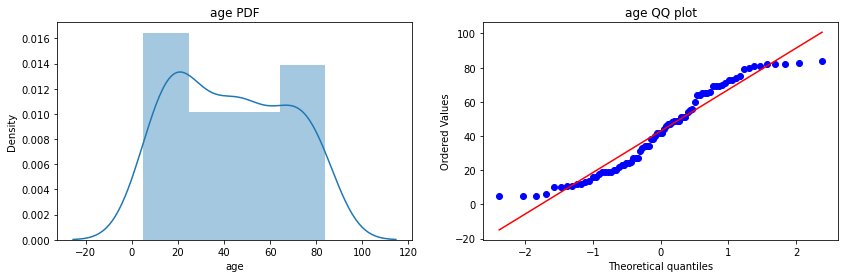

In [16]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['age'])
plt.title('age PDF')

plt.subplot(122)
stats.probplot(X_train['age'],dist="norm", plot=plt)
plt.title('age QQ plot')

plt.show()

C:\Users\nagam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


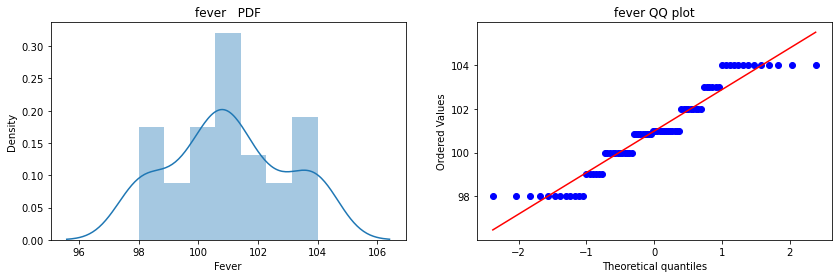

In [17]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fever'])
plt.title('fever   PDF')

plt.subplot(122)
stats.probplot(X_train['Fever'],dist="norm", plot=plt)
plt.title('fever QQ plot')

plt.show()

In [18]:
clf =LogisticRegression()
clf1 =DecisionTreeClassifier()

In [19]:
clf.fit(X_train,y_train)
clf1.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf1.predict(X_test)

print("accuracy DT",accuracy_score(y_test,y_pred))
print("accuracy LR",accuracy_score(y_test,y_pred1))

accuracy DT 0.65
accuracy LR 0.45


C:\Users\nagam\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [20]:
trf = FunctionTransformer(func=np.log1p)

In [21]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [22]:
clf =LogisticRegression()
clf1 =DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf1.fit(X_train_transformed,y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf1.predict(X_test)

print("accuracy LR",accuracy_score(y_test,y_pred))
print("accuracy DT",accuracy_score(y_test,y_pred1))

accuracy LR 0.65
accuracy DT 0.65


C:\Users\nagam\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [23]:
x_transformed = trf.fit_transform(X)

clf =LogisticRegression()
clf1 =DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,x_transformed,y,scoring="accuracy",cv=10)))
print("DT",np.mean(cross_val_score(clf1,x_transformed,y,scoring="accuracy",cv=10)))

C:\Users\nagam\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\nagam\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\nagam\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\nagam\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

LR 0.51
DT 0.5599999999999999


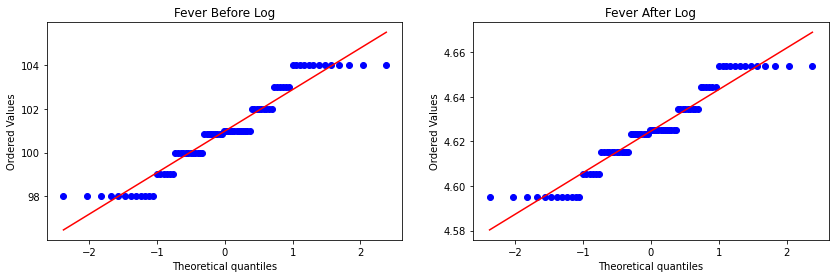

In [24]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fever'],dist = "norm",plot=plt)
plt.title('Fever Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fever'],dist="norm", plot=plt)
plt.title('Fever After Log')

plt.show()

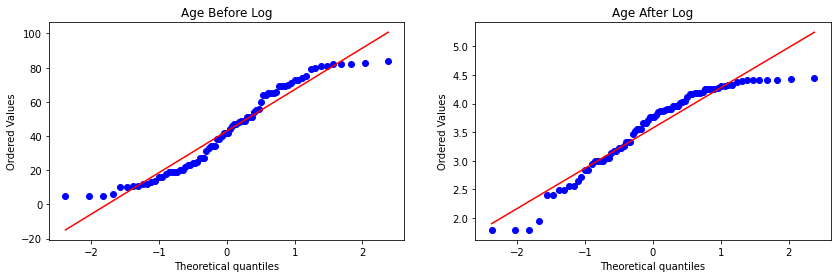

In [25]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['age'],dist = "norm",plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['age'],dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

In [26]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fever'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.fit_transform(X_test)

In [27]:
clf =LogisticRegression()
clf1 =DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf1.fit(X_train_transformed2,y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred1 = clf1.predict(X_test_transformed2)

print("accuracy LR",accuracy_score(y_test,y_pred))
print("accuracy DT",accuracy_score(y_test,y_pred1))

accuracy LR 0.65
accuracy DT 0.45


C:\Users\nagam\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [28]:
x_transformed2 = trf.fit_transform(X)

clf =LogisticRegression()
clf1 =DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,x_transformed2,y,scoring="accuracy",cv=10)))
print("DT",np.mean(cross_val_score(clf1,x_transformed2,y,scoring="accuracy",cv=10)))

LR 0.51
DT 0.5599999999999999


C:\Users\nagam\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\nagam\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\nagam\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\nagam\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r